# dummy

#### Model with deeper decoder

In [ ]:
class GCNDecoder(nn.Module):
    def __init__(self, latent_dim, num_nodes):
        super(GCNDecoder, self).__init__()
        self.latent_dim = latent_dim
        self.num_nodes = num_nodes
        
        # Fully connected layer to expand z to node features
        self.fc = nn.Linear(latent_dim, num_nodes * latent_dim)
        self.bn0 = nn.BatchNorm1d(latent_dim)

        # GCN layers
        self.conv1 = GCN(latent_dim, latent_dim * 2)
        self.bn1 = nn.BatchNorm1d(latent_dim * 2)
        self.conv2 = GCN(latent_dim * 2, latent_dim * 3)
        self.bn2 = nn.BatchNorm1d(num_nodes)
        self.conv3 = GCN(latent_dim * 3, num_nodes)
        self.bn3 = nn.BatchNorm1d(num_nodes)
    
    def forward(self, z):
        # Expand z to node features
        x = self.bn0(self.fc(z).view(self.num_nodes, self.latent_dim))

        # Initial adjacency matrix (identity matrix)
        adj = torch.eye(self.num_nodes, device=z.device)

        # Pass through GCN layers
        x = F.relu(self.bn1(self.conv1(x, adj)))
        x = F.dropout(x, training=self.training)
        x = F.relu(self.bn2(self.conv2(x, adj)))
        x = F.dropout(x, training=self.training)
        x = F.relu(self.bn3(self.conv3(x, adj)))
        x = F.dropout(x, training=self.training)

        # Generate adjacency matrix
        adj_pred = x

        # Ensure symmetry of the adjacency matrix
        adj_pred = (adj_pred + adj_pred.t()) / 2
        
        # Set the diagonal elements to zero (no self-connections)
        adj_pred = adj_pred - torch.diag(torch.diag(adj_pred))
        return adj_pred

#### add GAT-encoders

# plotting

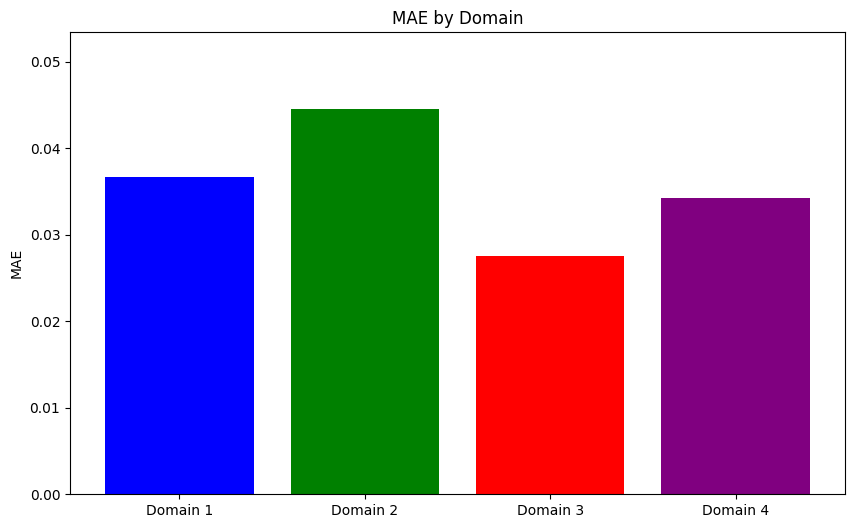

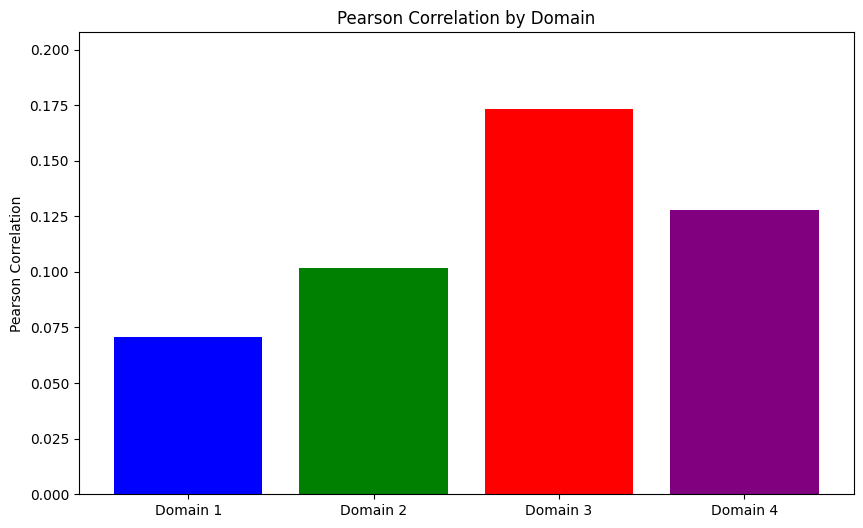

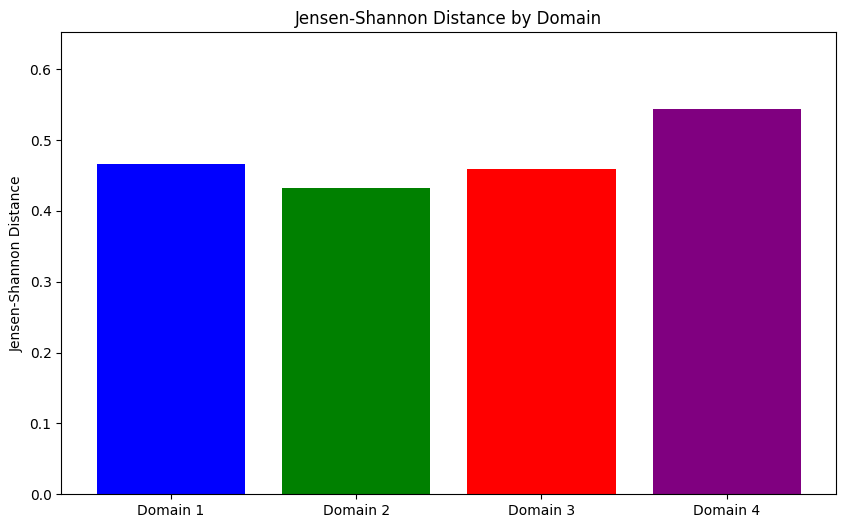

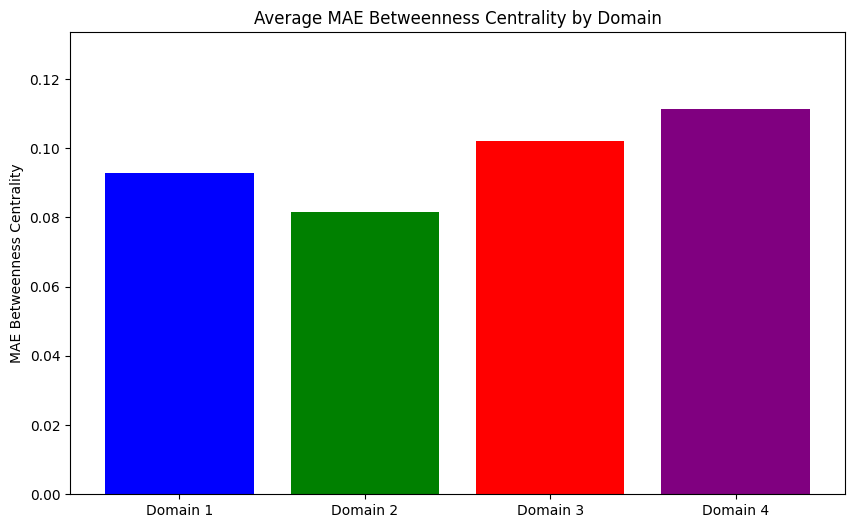

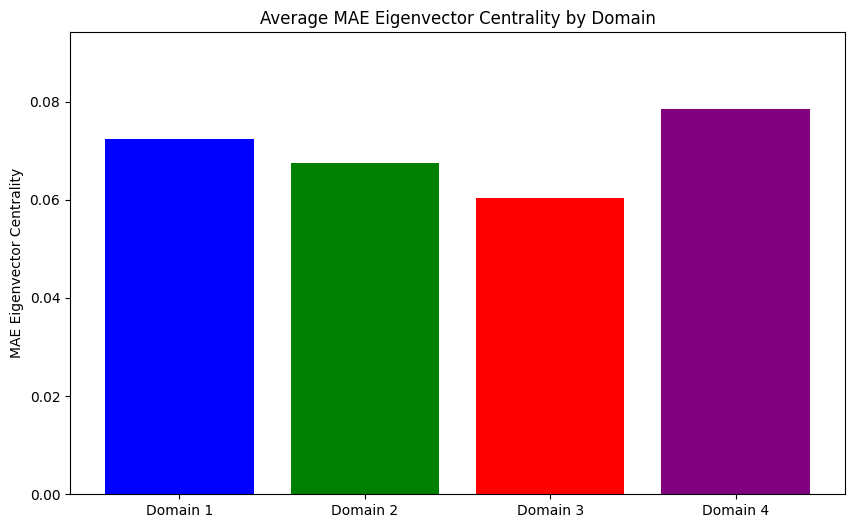

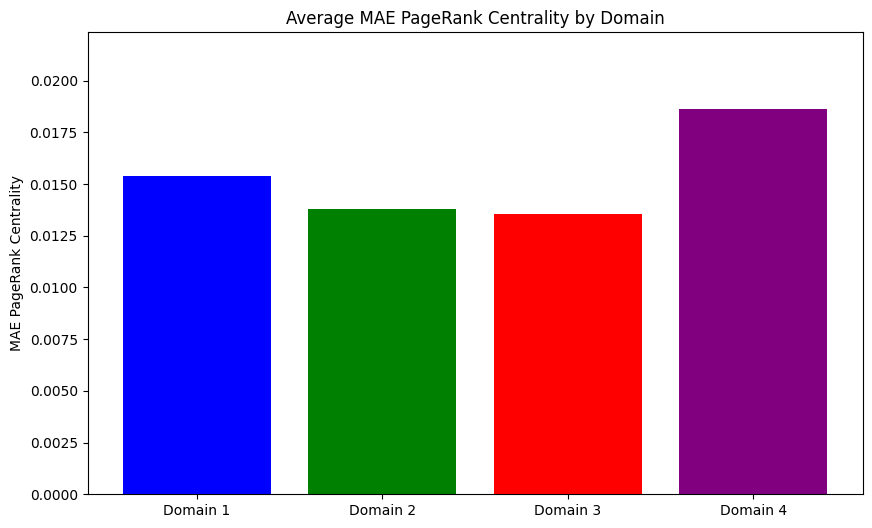

In [3]:
import matplotlib.pyplot as plt

# Example values
domains                     = ['Domain 1', 'Domain 2', 'Domain 3', 'Domain 4']
mae_values                  = [0.036718633, 0.044495523,         0.02750722, 0.034249287]
pearson_correlation_values  = [0.07061734, 0.1016017591091239, 0.17312822346849915, 0.12799776816366323]
js_distance_values          = [0.466316934, 0.43184613820092005, 0.45979502088875723, 0.5434342454107574]
mae_betweenness_values      = [0.092754855, 0.08147822765469824, 0.10203590527119939, 0.1112681436210848]
mae_eigenvector_values      = [0.072360223, 0.06756021774044244, 0.06025210669609014, 0.07842065966601097]
mae_pagerank_values         = [0.015412330, 0.01381705161234493, 0.013568437113498292, 0.018616093254500622]

# Function to plot bar charts
def plot_bar_chart(values, title, ylabel):
    plt.figure(figsize=(10, 6))
    plt.bar(domains, values, color=['blue', 'green', 'red', 'purple'])
    plt.title(title)
    plt.ylabel(ylabel)
    plt.ylim(0, max(values) * 1.2)
    plt.show()

# Plotting each metric
plot_bar_chart(mae_values, 'MAE by Domain', 'MAE')
plot_bar_chart(pearson_correlation_values, 'Pearson Correlation by Domain', 'Pearson Correlation')
plot_bar_chart(js_distance_values, 'Jensen-Shannon Distance by Domain', 'Jensen-Shannon Distance')
plot_bar_chart(mae_betweenness_values, 'Average MAE Betweenness Centrality by Domain', 'MAE Betweenness Centrality')
plot_bar_chart(mae_eigenvector_values, 'Average MAE Eigenvector Centrality by Domain', 'MAE Eigenvector Centrality')
plot_bar_chart(mae_pagerank_values, 'Average MAE PageRank Centrality by Domain', 'MAE PageRank Centrality')


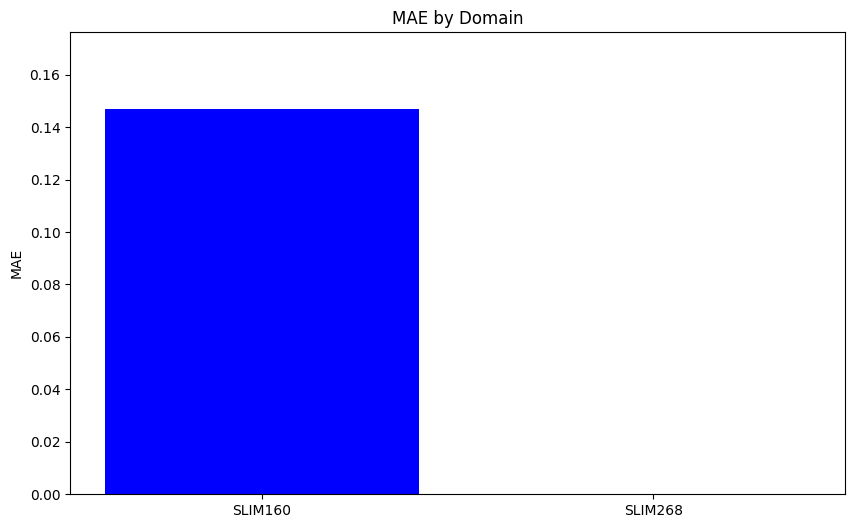

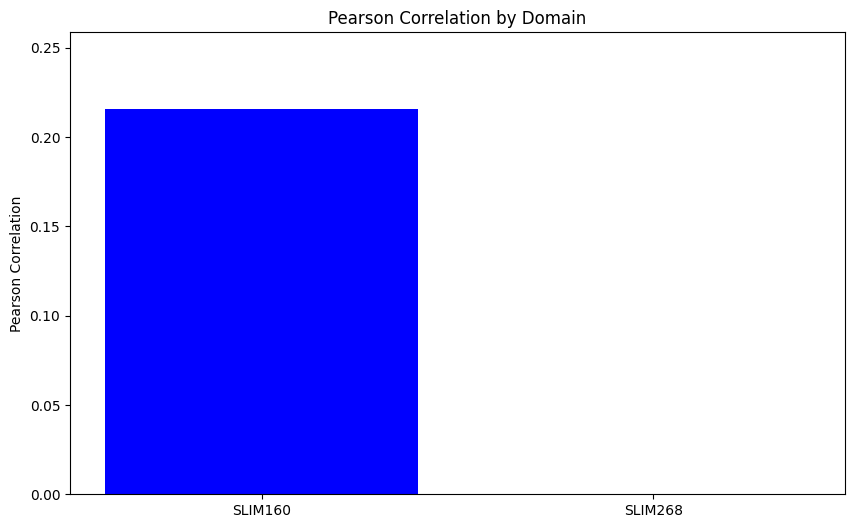

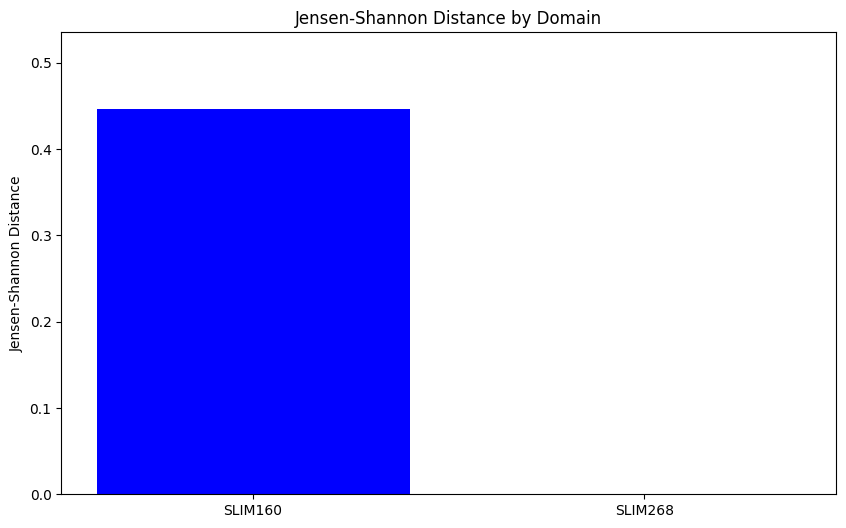

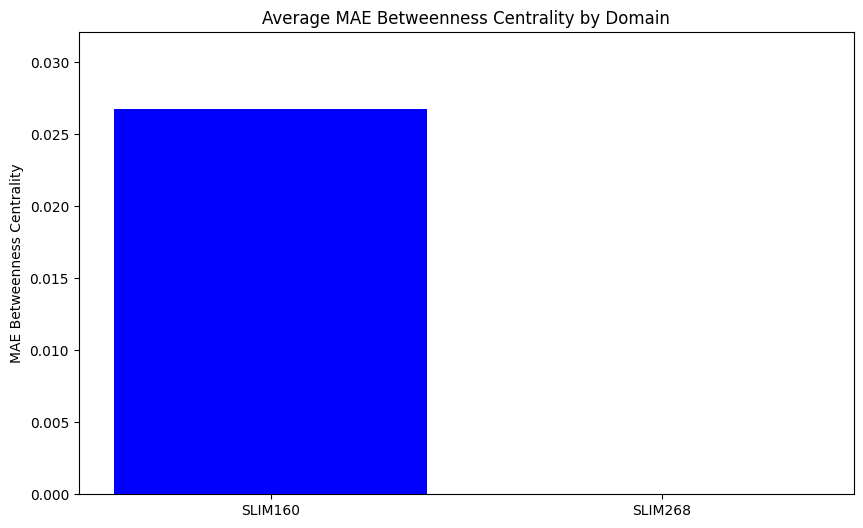

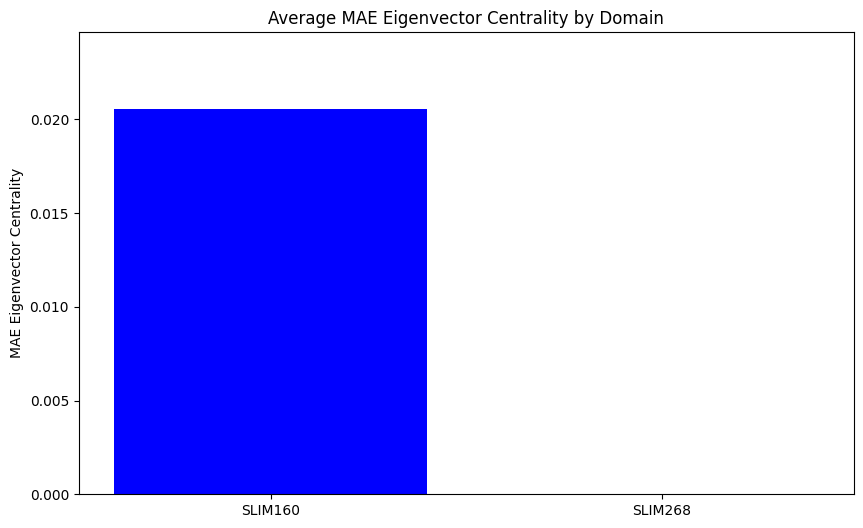

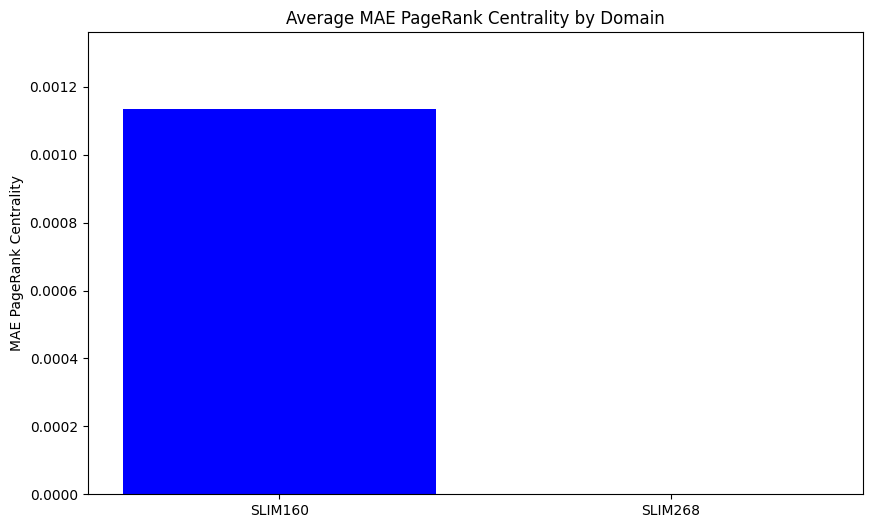

In [1]:
import matplotlib.pyplot as plt

# Example values
domains                     = ['SLIM160', 'SLIM268']
mae_values                  = [0.14681518, 0.0]
pearson_correlation_values  = [0.21554672, 0.0]
js_distance_values          = [0.44625199, 0.0]
mae_betweenness_values      = [0.02671928, 0.0]
mae_eigenvector_values      = [0.02053624, 0.0]
mae_pagerank_values         = [0.00113414, 0.0]

# Function to plot bar charts
def plot_bar_chart(values, title, ylabel):
    plt.figure(figsize=(10, 6))
    plt.bar(domains, values, color=['blue', 'green', 'red', 'purple'])
    plt.title(title)
    plt.ylabel(ylabel)
    plt.ylim(0, max(values) * 1.2)
    plt.show()

# Plotting each metric
plot_bar_chart(mae_values, 'MAE by Domain', 'MAE')
plot_bar_chart(pearson_correlation_values, 'Pearson Correlation by Domain', 'Pearson Correlation')
plot_bar_chart(js_distance_values, 'Jensen-Shannon Distance by Domain', 'Jensen-Shannon Distance')
plot_bar_chart(mae_betweenness_values, 'Average MAE Betweenness Centrality by Domain', 'MAE Betweenness Centrality')
plot_bar_chart(mae_eigenvector_values, 'Average MAE Eigenvector Centrality by Domain', 'MAE Eigenvector Centrality')
plot_bar_chart(mae_pagerank_values, 'Average MAE PageRank Centrality by Domain', 'MAE PageRank Centrality')
